In [66]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', None)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

**Lets start with importing and reading the dataset**

In [216]:
traind = pd.read_csv('C:/Users/ASUS/Desktop/python_datasets/imarticus/Pranjal_Sir/titanic competition/train.csv')
testd  = pd.read_csv('C:/Users/ASUS/Desktop/python_datasets/imarticus/Pranjal_Sir/titanic competition/test.csv')

In [217]:
traind.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [218]:
testd.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [219]:
traind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Data Cleaning #

*** We will perform same data cleaning both on train and test data simultaneously ***

In [220]:
traind.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [221]:
traind['Cabin'].isnull().sum()*100/traind['Cabin'].isnull().count()

77.10437710437711

In [222]:
testd.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [223]:
testd['Cabin'].isnull().sum()*100/testd['Cabin'].isnull().count()

78.22966507177034

*** Since both train and test data have about 78% of null values in 'Cabin' column, we will drop that column ***

In [224]:
traind.drop(['Cabin'], axis=1, inplace=True)
testd.drop(['Cabin'], axis=1, inplace=True)

In [225]:
traind['Age'].isnull().sum()*100/traind['Age'].isnull().count()

19.865319865319865

In [226]:
testd['Age'].isnull().sum()*100/testd['Age'].isnull().count()

20.574162679425836

*** There are about 20% null values in 'Age' column, so lets fill these values using some logic ***

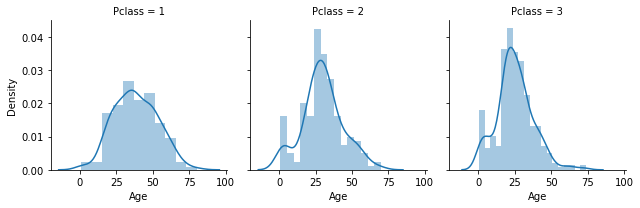

In [227]:
grid = sns.FacetGrid(data=traind, col='Pclass')
grid.map(sns.distplot, 'Age')
warnings.filterwarnings('ignore')

In [228]:
traind[traind['Pclass']==1]['Age'].median()

37.0

In [229]:
traind[traind['Pclass']==2]['Age'].median()

29.0

In [230]:
traind[traind['Pclass']==3]['Age'].median()

24.0

In [231]:
age = traind[['Age','Pclass']].dropna()

In [232]:
from scipy.stats import f_oneway
f_oneway(pd.Series.to_list(age[age['Pclass']==1]['Age']),pd.Series.to_list(age[age['Pclass']==2]['Age']),pd.Series.to_list(age[age['Pclass']==3]['Age']))

F_onewayResult(statistic=57.443484340676214, pvalue=7.487984171959904e-24)

In [233]:
testd[testd['Pclass']==1]['Age'].median()

42.0

In [234]:
testd[testd['Pclass']==2]['Age'].median()

26.5

In [235]:
testd[testd['Pclass']==3]['Age'].median()

24.0

*** From the above graphs, it can be assumed that median Age is different for different Pclasses. lets check that how significant it is to consider the difference between the median/mean using Annova test. ***

In [236]:
age = traind[['Age','Pclass']].dropna()

In [237]:
from scipy.stats import f_oneway

In [238]:
f_oneway(pd.Series.to_list(age[age['Pclass']==1]['Age']),pd.Series.to_list(age[age['Pclass']==2]['Age']),pd.Series.to_list(age[age['Pclass']==3]['Age']))

F_onewayResult(statistic=57.443484340676214, pvalue=7.487984171959904e-24)

*** P-Value is less that 0.05, we can consider this difference as significant, So lets fill the Null values ***

In [239]:
traind['Age'][(traind['Age'].isnull()) & (traind['Pclass']==1)] = traind[traind['Pclass']==1]['Age'].median()
traind['Age'][(traind['Age'].isnull()) & (traind['Pclass']==2)] = traind[traind['Pclass']==2]['Age'].median()
traind['Age'][(traind['Age'].isnull()) & (traind['Pclass']==3)] = traind[traind['Pclass']==3]['Age'].median()

In [240]:
testd['Age'][(testd['Age'].isnull()) & (testd['Pclass']==1)] = testd[testd['Pclass']==1]['Age'].median()
testd['Age'][(testd['Age'].isnull()) & (testd['Pclass']==2)] = testd[testd['Pclass']==2]['Age'].median()
testd['Age'][(testd['Age'].isnull()) & (testd['Pclass']==3)] = testd[testd['Pclass']==3]['Age'].median()

In [241]:
traind.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [242]:
testd.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

*** There are only 2 Null values in 'Embarked' column of traind dataset, so we can directly eliminate those rows ***

In [243]:
traind.dropna(subset=['Embarked'],inplace=True)

In [244]:
traind.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

*** Finally lets fill the null value in 'Fare' column of testd Dataset ***

In [245]:
testd[testd['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


In [246]:
testd[(testd['Pclass']==3) & (testd['SibSp']+testd['Parch']==0)]['Fare'].median()

7.7958

In [247]:
testd['Fare'][testd['Fare'].isnull()] = testd[(testd['Pclass']==3) & (testd['SibSp']+testd['Parch']==0)]['Fare'].median()

In [248]:
testd[testd['Fare'].isna()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


*** Now there are no null values in our Datasets, Lets move ahead! ***

In [249]:
traind.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


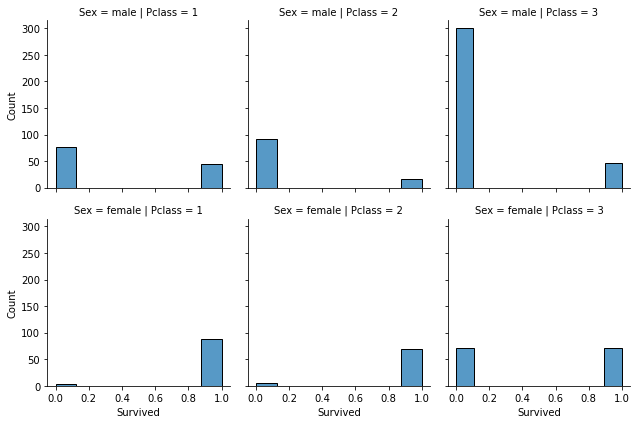

In [250]:
grid = sns.FacetGrid(traind, col='Pclass', row='Sex')
grid.map(sns.histplot, 'Survived', )

In [251]:
traind[['Pclass','Survived','Sex']].groupby(['Pclass']).mean()

,Survived
Pclass,
1,0.626168
2,0.472826
3,0.242363


In [252]:
traind[['Pclass','Survived','Sex']].groupby(['Sex','Pclass']).mean()

Survived
Sex    Pclass          
female 1       0.967391
       2       0.921053
       3       0.500000
male   1       0.368852
       2       0.157407
       3       0.135447

*** From the above calculations, we can assume that survival rate is different among different Pclass values, So the 'Pclass' is must have feature in our model ***

In [253]:
traind.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


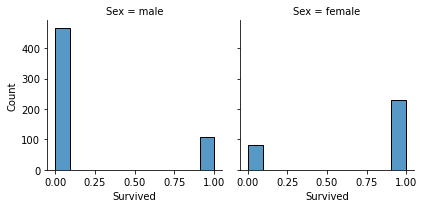

In [254]:
grid = sns.FacetGrid(traind, col='Sex')
grid.map(sns.histplot, 'Survived')

In [255]:
traind[['Sex','Survived']].groupby(['Sex']).mean()

,Survived
Sex,
female,0.740385
male,0.188908


*** It can be seen that, only 18% of male Survived the Titanic disaster while 74% female survived the same. ***

In [256]:
traind.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [257]:
traind[['Survived','Age']].corr()

,Survived,Age
Survived,1.000000,-0.052051
Age,-0.052051,1.000000


***'Age' and 'Survived' columns have no significant correlation, so lets try to to feature engineering on 'Age' column and try to get more significant column***

<AxesSubplot:xlabel='Age', ylabel='Density'>

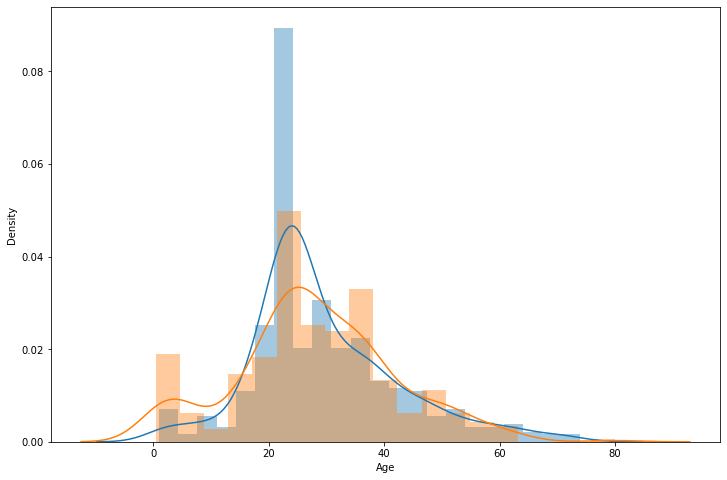

In [258]:
plt.figure(figsize=(12,8))
sns.distplot(traind[traind['Survived']==0]['Age'])
sns.distplot(traind[traind['Survived']==1]['Age'])

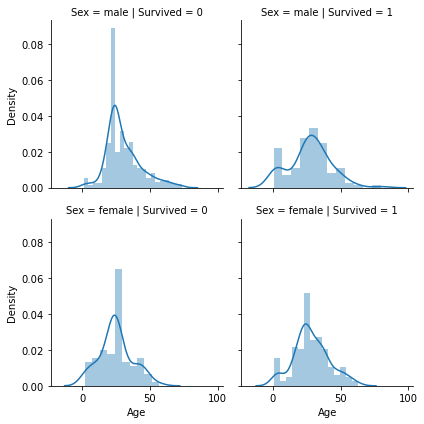

In [125]:
grid = sns.FacetGrid(traind, col='Survived', row='Sex')
grid.map(sns.distplot, 'Age')

In [261]:
traind['Agecut'] = pd.cut(traind['Age'],[0,15,60,80])
testd['Agecut'] = pd.cut(testd['Age'],[0,15,60,80])

In [262]:
traind[['Survived', 'Agecut']].groupby(['Agecut']).mean()

,Survived
Agecut,
"(0, 15]",0.590361
"(15, 60]",0.365605
"(60, 80]",0.190476


In [263]:
traind['Agecut']=traind['Agecut'].astype('string')
testd['Agecut']=testd['Agecut'].astype('string')

In [264]:
traind['Agecut'].replace({'(0, 15]':0,'(15, 60]':1,'(60, 80]':2}, inplace=True)
testd['Agecut'].replace({'(0, 15]':0,'(15, 60]':1,'(60, 80]':2}, inplace=True)

In [265]:
traind[['Agecut', 'Survived']].corr()

,Agecut,Survived
Agecut,1.000000,-0.147151
Survived,-0.147151,1.000000


In [266]:
traind['Agecut'].replace({0:'child',1:'adult',2:'old'}, inplace=True)
testd['Agecut'].replace({0:'child',1:'adult',2:'old'}, inplace=True)

***Now we have a significant negative correlation between 'Age' and 'Survived'***

In [117]:
traind.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Agecut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,adult


In [267]:
testd.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Agecut
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,adult
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,adult
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,old
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,adult
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,adult


<AxesSubplot:xlabel='Fare', ylabel='Density'>

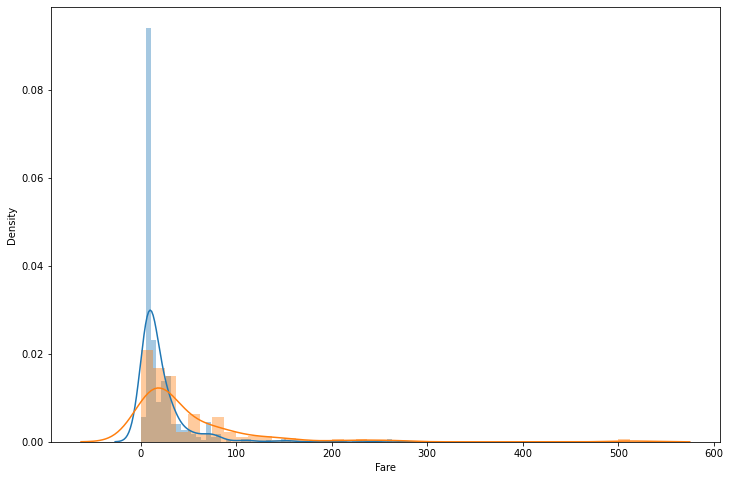

In [268]:
plt.figure(figsize=(12,8))
sns.distplot(traind[traind['Survived']==0]['Fare'])
sns.distplot(traind[traind['Survived']==1]['Fare'])

In [119]:
traind.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005028,-0.035330,0.033008,-0.057686,-0.001657,0.012703
Survived,-0.005028,1.000000,-0.335549,-0.052051,-0.034040,0.083151,0.255290
Pclass,-0.035330,-0.335549,1.000000,-0.405549,0.081656,0.016824,-0.548193
Age,0.033008,-0.052051,-0.405549,1.000000,-0.242807,-0.170089,0.120938
SibSp,-0.057686,-0.034040,0.081656,-0.242807,1.000000,0.414542,0.160887
Parch,-0.001657,0.083151,0.016824,-0.170089,0.414542,1.000000,0.217532
Fare,0.012703,0.255290,-0.548193,0.120938,0.160887,0.217532,1.000000


In [269]:
traind['Farecut']=pd.cut(traind['Fare'],[0,40,800])

In [270]:
traind[['Farecut', 'Survived']].groupby('Farecut').mean()

,Survived
Farecut,
"(0, 40]",0.325714
"(40, 800]",0.637931


In [271]:
traind.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  889 non-null    int64   
 1   Survived     889 non-null    int64   
 2   Pclass       889 non-null    int64   
 3   Name         889 non-null    object  
 4   Sex          889 non-null    object  
 5   Age          889 non-null    float64 
 6   SibSp        889 non-null    int64   
 7   Parch        889 non-null    int64   
 8   Ticket       889 non-null    object  
 9   Fare         889 non-null    float64 
 10  Embarked     889 non-null    object  
 11  Agecut       889 non-null    object  
 12  Farecut      874 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 91.3+ KB


In [275]:
traind['Farecut']=traind['Farecut'].astype('Int64')

In [273]:
traind['Farecut'].value_counts()

(0.0, 40.0]      700
(40.0, 800.0]    174
Name: Farecut, dtype: Int64

In [274]:
traind['Farecut'].replace({'(0.0, 40.0]':0,'(40.0, 800.0]':1}, inplace=True)

In [276]:
traind[['Survived','Farecut']].corr()

,Survived,Farecut
Survived,1.00000,0.25586
Farecut,0.25586,1.00000


In [277]:
traind.drop('Farecut', axis=1,inplace=True)

***Even after Feature engineering 'Fare' column is contributing the same as it was originally contributing, so lets keep that column as it is i.e. continous feature***

In [278]:
traind.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Agecut
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,adult


In [279]:
traind[['Embarked','Survived']].groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [139]:
traind[['Embarked','Survived', 'Pclass']].groupby(['Pclass','Embarked']).count()

Survived
Pclass Embarked          
1      C               85
       Q                2
       S              127
2      C               17
       Q                3
       S              164
3      C               66
       Q               72
       S              353

In [280]:
traind['emb']=traind['Embarked'].replace({'C':0,'Q':1,'S':2})
testd['emb']=testd['Embarked'].replace({'C':0,'Q':1,'S':2})

In [281]:
traind[['Survived','emb']].corr()

,Survived,emb
Survived,1.000000,-0.169718
emb,-0.169718,1.000000


***We will keep embarked as it is***

In [285]:
traind['Title'] = traind['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
testd['Title'] = testd['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [286]:
traind.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Agecut,emb,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,adult,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,adult,0,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,adult,2,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,adult,2,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,adult,2,Mr


In [287]:
testd.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Agecut,emb,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,adult,1,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,adult,2,Mrs
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,old,1,Mr
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,adult,2,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,adult,2,Mrs


In [288]:
traind['Title'].value_counts()

Mr          517
Miss        181
Mrs         124
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [293]:
traind['Title'].replace({'Ms':'Miss','Mlle':'Mrs','Mme':'Mrs','Lady':'Mrs','Capt':'rare','Col':'rare','Countess':'rare','Don':'rare','Dr':'rare','Jonkheer':'rare','Major':'rare','Rev':'rare','Sir':'rare'}, inplace=True)
testd['Title'].replace({'Ms':'Miss','Mlle':'Mrs','Mme':'Mrs','Lady':'Mrs','Capt':'rare','Col':'rare','Countess':'rare','Don':'rare','Dr':'rare','Jonkheer':'rare','Major':'rare','Rev':'rare','Sir':'rare','Dona':'rare'}, inplace=True)

In [294]:
traind['Title'].value_counts()

Mr        517
Miss      182
Mrs       128
Master     40
rare       22
Name: Title, dtype: int64

In [295]:
testd['Title'].value_counts()

Mr        240
Miss       79
Mrs        72
Master     21
rare        6
Name: Title, dtype: int64

In [296]:
(traind[['Title', 'Survived']].groupby(['Title']).mean())

,Survived
Title,
Master,0.575000
Miss,0.697802
Mr,0.156673
Mrs,0.796875
rare,0.318182


In [297]:
traind['title'] = traind['Title'].replace({'Mr':0,'rare':1,'Master':2,'Miss':3,'Mrs':4})

In [298]:
traind[['title','Survived']].corr()

,title,Survived
title,1.000000,0.566574
Survived,0.566574,1.000000


In [299]:
traind.drop('title',axis=1, inplace=True)


In [300]:
traind.drop('emb',axis=1, inplace=True)

***'Title' column has strong correlation with Survival rate, so we can consider this column in our model***

In [301]:
traind.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Agecut,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,adult,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,adult,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,adult,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,adult,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,adult,Mr


In [306]:
traind['Family']=traind['SibSp']+traind['Parch']+1
testd['Family']=testd['SibSp']+testd['Parch']+1

In [307]:
traind[['Family','Survived']].groupby(['Family']).mean()

,Survived
Family,
1,0.300935
2,0.552795
3,0.578431
4,0.724138
5,0.200000
6,0.136364
7,0.333333
8,0.000000
11,0.000000


In [305]:
traind[['Family','Survived']].corr()

,Family,Survived
Family,1.000000,0.018277
Survived,0.018277,1.000000


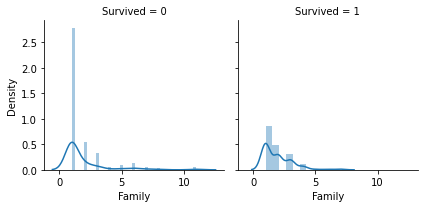

In [308]:
grid = sns.FacetGrid(traind, col='Survived')
grid.map(sns.distplot,'Family')

In [309]:
traind['Familysize']=pd.cut(traind['Family'],[0,1,3,10])
testd['Familysize']=pd.cut(testd['Family'],[0,1,3,10])

In [310]:
traind[['Familysize','Survived','Sex']].groupby(['Familysize','Sex']).mean()

Survived
Familysize Sex             
(0, 1]     female  0.782258
           male    0.155718
(1, 3]     female  0.801471
           male    0.307087
(3, 10]    female  0.510204
           male    0.171429

In [311]:
traind['Familysize']=traind['Familysize'].astype('string')
testd['Familysize']=testd['Familysize'].astype('string')

In [312]:
traind['Familysize'].replace({'(0.0, 1.0]':2,'(1.0, 3.0]':1,'(3.0, 10.0]':0}, inplace=True)
testd['Familysize'].replace({'(0.0, 1.0]':2,'(1.0, 3.0]':1,'(3.0, 10.0]':0}, inplace=True)

In [314]:
traind['Familysize']=traind['Familysize'].astype('Int64')
testd['Familysize']=testd['Familysize'].astype('Int64')

In [315]:
traind[['Familysize','Survived']].corr()

,Familysize,Survived
Familysize,1.00000,-0.15395
Survived,-0.15395,1.00000


In [205]:
traind.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Agecut,Title,Family,Familysize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,adult,Mr,2,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,adult,Mrs,2,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,adult,Miss,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,adult,Mrs,2,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,adult,Mr,1,2


In [316]:
traind['Familysize'].replace({2:'alone',1:'midfamily',0:'largefamily'}, inplace=True)
testd['Familysize'].replace({2:'alone',1:'midfamily',0:'largefamily'}, inplace=True)

In [319]:
traind['Familysize'].value_counts()

alone          535
midfamily      263
largefamily     84
Name: Familysize, dtype: int64

***'Familysize' feature looks significant now, We can put it in our Model.***

***Lets remove the not necessary columns from dataset***

In [320]:
traind.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Agecut,Title,Family,Familysize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,adult,Mr,2,midfamily
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,adult,Mrs,2,midfamily
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,adult,Miss,1,alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,adult,Mrs,2,midfamily
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,adult,Mr,1,alone


In [321]:
testd.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Agecut,emb,Title,Family,Familysize
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,adult,1,Mr,1,alone
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,adult,2,Mrs,2,midfamily
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,old,1,Mr,1,alone
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,adult,2,Mr,1,alone
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,adult,2,Mrs,3,midfamily


In [324]:
traind.drop(['Name','Age','SibSp','Parch','Ticket','Family'], axis=1, inplace=True)

In [326]:
traind.head()

,PassengerId,Survived,Pclass,Sex,Fare,Embarked,Agecut,Title,Familysize
0,1,0,3,male,7.2500,S,adult,Mr,midfamily
1,2,1,1,female,71.2833,C,adult,Mrs,midfamily
2,3,1,3,female,7.9250,S,adult,Miss,alone
3,4,1,1,female,53.1000,S,adult,Mrs,midfamily
4,5,0,3,male,8.0500,S,adult,Mr,alone


In [327]:
traincleaned.head()

,PassengerId,Survived,Pclass,Sex,Fare,Embarked,Agecut,Title,Familysize
0,1,0,3,male,7.2500,S,adult,Mr,midfamily
1,2,1,1,female,71.2833,C,adult,Mrs,midfamily
2,3,1,3,female,7.9250,S,adult,Miss,alone
3,4,1,1,female,53.1000,S,adult,Mrs,midfamily
4,5,0,3,male,8.0500,S,adult,Mr,alone


In [328]:
testd.head()

,PassengerId,Pclass,Sex,Fare,Embarked,Agecut,Title,Familysize
0,892,3,male,7.8292,Q,adult,Mr,alone
1,893,3,female,7.0000,S,adult,Mrs,midfamily
2,894,2,male,9.6875,Q,old,Mr,alone
3,895,3,male,8.6625,S,adult,Mr,alone
4,896,3,female,12.2875,S,adult,Mrs,midfamily


***Lets start building our Model***

In [337]:
traindd = pd.get_dummies(data=traind, drop_first=True)

In [338]:
traindd.head()

,PassengerId,Survived,Pclass,Fare,Sex_male,Embarked_Q,Embarked_S,Agecut_child,Agecut_old,Title_Miss,Title_Mr,Title_Mrs,Title_rare,Familysize_largefamily,Familysize_midfamily
0,1,0,3,7.2500,1,0,1,0,0,0,1,0,0,0,1
1,2,1,1,71.2833,0,0,0,0,0,0,0,1,0,0,1
2,3,1,3,7.9250,0,0,1,0,0,1,0,0,0,0,0
3,4,1,1,53.1000,0,0,1,0,0,0,0,1,0,0,1
4,5,0,3,8.0500,1,0,1,0,0,0,1,0,0,0,0


In [339]:
from sklearn.model_selection import train_test_split

In [340]:
train, test = train_test_split(traindd, train_size=0.8)

In [341]:
train.head()

,PassengerId,Survived,Pclass,Fare,Sex_male,Embarked_Q,Embarked_S,Agecut_child,Agecut_old,Title_Miss,Title_Mr,Title_Mrs,Title_rare,Familysize_largefamily,Familysize_midfamily
709,710,1,3,15.2458,1,0,0,0,0,0,0,0,0,0,1
385,386,0,2,73.5000,1,0,1,0,0,0,1,0,0,0,0
847,848,0,3,7.8958,1,0,0,0,0,0,1,0,0,0,0
569,570,1,3,7.8542,1,0,1,0,0,0,1,0,0,0,0
464,465,0,3,8.0500,1,0,1,0,0,0,1,0,0,0,0


In [342]:
trainx = train.iloc[:,2::]
trainy = train.iloc[:,1]
testx = test.iloc[:,2::]
testy = test.iloc[:,1]

In [374]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.svm import SVC

***1) Logistic Regression***

In [344]:
logreg = LogisticRegression()

In [345]:
logreg.fit(trainx, trainy)

LogisticRegression()

In [346]:
logpred = logreg.predict(testx)

In [349]:
confusion_matrix(testy, logpred)

array([[94, 13],
       [27, 44]], dtype=int64)

In [350]:
accuracy_score(testy, logpred)

0.7752808988764045

***2) Decision Tree***

In [405]:
dt = DecisionTreeClassifier()

In [406]:
dt.fit(trainx, trainy)

DecisionTreeClassifier()

In [407]:
dtpred = dt.predict(testx)

In [408]:
confusion_matrix(testy, dtpred)

array([[99,  8],
       [18, 53]], dtype=int64)

In [409]:
accuracy_score(testy, dtpred)

0.8539325842696629

***3) Random Forest***

In [415]:
rf = RandomForestClassifier()

In [416]:
rf.fit(trainx, trainy)

RandomForestClassifier()

In [417]:
rfpred = rf.predict(testx)

In [418]:
confusion_matrix(testy, rfpred)

array([[98,  9],
       [18, 53]], dtype=int64)

In [419]:
accuracy_score(testy, rfpred)

0.848314606741573

***4) Adaboost***

In [420]:
adb = AdaBoostClassifier()

In [421]:
adb.fit(trainx, trainy)

AdaBoostClassifier()

In [422]:
adbpred = adb.predict(testx)

In [423]:
confusion_matrix(testy, adbpred)

array([[96, 11],
       [26, 45]], dtype=int64)

In [424]:
accuracy_score(testy, adbpred)

0.7921348314606742

***5) XG-Boost***

In [450]:
xg = XGBClassifier()

In [451]:
xg.fit(trainx, trainy)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [452]:
xgpred = xg.predict(testx)

In [453]:
confusion_matrix(testy, xgpred)

array([[100,   7],
       [ 17,  54]], dtype=int64)

In [454]:
accuracy_score(testy, xgpred)

0.8651685393258427

***6) SVM***

In [375]:
svm = SVC()

In [376]:
svm.fit(trainx, trainy)

SVC()

In [377]:
svmpred = svm.predict(testx)

In [378]:
confusion_matrix(testy, svmpred)

array([[105,   2],
       [ 52,  19]], dtype=int64)

In [379]:
accuracy_score(testy, svmpred)

0.6966292134831461

***From above models we can see that, XGBoost has maximum accuracy, lets predict for test data***

In [471]:
testd.head()

,PassengerId,Pclass,Sex,Fare,Embarked,Agecut,Title,Familysize
0,892,3,male,7.8292,Q,adult,Mr,alone
1,893,3,female,7.0000,S,adult,Mrs,midfamily
2,894,2,male,9.6875,Q,old,Mr,alone
3,895,3,male,8.6625,S,adult,Mr,alone
4,896,3,female,12.2875,S,adult,Mrs,midfamily


In [472]:
testt = pd.get_dummies(testd, drop_first=True)

In [473]:
testt.head()

,PassengerId,Pclass,Fare,Sex_male,Embarked_Q,Embarked_S,Agecut_child,Agecut_old,Title_Miss,Title_Mr,Title_Mrs,Title_rare,Familysize_largefamily,Familysize_midfamily
0,892,3,7.8292,1,1,0,0,0,0,1,0,0,0,0
1,893,3,7.0000,0,0,1,0,0,0,0,1,0,0,1
2,894,2,9.6875,1,1,0,0,1,0,1,0,0,0,0
3,895,3,8.6625,1,0,1,0,0,0,1,0,0,0,0
4,896,3,12.2875,0,0,1,0,0,0,0,1,0,0,1


In [474]:
finalpred = xg.predict(testt.iloc[:,1::])

In [487]:
df = pd.DataFrame({'PassengerId':testt.iloc[:,0],'Survived':finalpred})

In [488]:
df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,0
7,899,0
8,900,1
9,901,0


In [489]:
df.to_csv('titanic_pred.csv', encoding='utf-8', index=False)